In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

In [1]:
#import libaries
import torch
from matplotlib import pyplot as plt
import numpy as np
import json
import cv2

e:\School\Minor - Artificial Intelligence\Projects\vEnv\tensorflow\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp6/weights/last.pt')

Using cache found in C:\Users\LorenzoWijntjes/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-30 Python-3.7.4 torch-1.8.1+cu111 CUDA:0 (NVIDIA GeForce RTX 3060, 12287MiB)

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [20]:
#load image
img = './images/test6.png'

In [21]:
#make predictions
results = model(img)
results.print()

image 1/1: 104x382 (no detections)
Speed: 2.0ms pre-process, 11.5ms inference, 0.5ms NMS per image at shape (1, 3, 192, 640)


In [12]:
#dump results to a json file
data = []
classTypes = ["Input", "Checkbox"]
for i in results.xywh[0]:
    if(float(i[4]) > 0.95):
        data.append( {
        "x": float(i[0]),
        "y": float(i[1]),
        "w": float(i[2]),
        "h": float(i[3]),
        "class": classTypes[int(i[5])],
        })
with open("results.json", "w") as file:
    json.dump(data, file, indent=4)

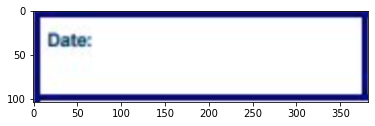

In [22]:
#plot the results and save the image
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()
plt.imsave('result.jpg', np.squeeze(results.render()))

In [27]:
#train model
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 150 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
From https://github.com/ultralytics/yolov5
   5c990e3..6935a54  master     -> origin/master
   fba9ebf..c7b1a3c  classifier -> origin/classifier
github:  YOLOv5 is out of date by 24 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5  v6.1-246-g2dd3db0 Python-3.9.7 torch-1.10.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, 


               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  50%|█████     | 2/4 [00:07<00:07,  3.71s/it]WARNING: NMS time limit 1.260s exceeded

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:  75%|███████▌  | 3/4 [00:10<00:03,  3.57s/it]WARNING: NMS time limit 0.630s exceeded

               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:12<00:00,  2.70s/it]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100%|██████████| 4/4 [00:12<00:00,  3.03s/it]
                 all        107        283    0.00551      0.145    0.00423    0.00109

     Epoch   gpu_mem       box       obj       cls    labels  img_size

  0%|          | 0/7 [00:00<?, ?it/s]
     5/149        0G    0.1273   0.09888   0.02363       581       320:   0%|          | 0/7 [00:03<?, ?it/s]
     5/149        0G    0.1273   0.09888   0.02363       581       320:  14